In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
lin = datasets.load_linnerud()

In [6]:
lin

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [7]:
df_data = pd.DataFrame(lin.data, columns = lin.feature_names)
df_labels = pd.DataFrame(lin.target, columns = lin.target_names)

In [14]:
data = pd.concat([df_data, df_labels.Pulse], axis=1)

In [15]:
data

,Chins,Situps,Jumps,Pulse
0,5.0,162.0,60.0,50.0
1,2.0,110.0,60.0,52.0
2,12.0,101.0,101.0,58.0
3,12.0,105.0,37.0,62.0
4,13.0,155.0,58.0,46.0
5,4.0,101.0,42.0,56.0
6,8.0,101.0,38.0,56.0
7,6.0,125.0,40.0,60.0
8,15.0,200.0,40.0,74.0
9,17.0,251.0,250.0,56.0


In [21]:
X1 = data.iloc[:,0:3].values
y1 = data.iloc[:,3].values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=0) 

In [24]:
X1

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [25]:
y1

array([50., 52., 58., 62., 46., 56., 56., 60., 74., 56., 50., 52., 64.,
       50., 46., 62., 54., 52., 54., 68.])

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation = 'elu', input_shape = (3,)))
model.add(Dense(50, activation = 'elu'))
model.add(Dense(30, activation = 'elu'))
model.add(Dense(15, activation = 'elu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 100)               400       
                                                                 
 dense_103 (Dense)           (None, 50)                5050      
                                                                 
 dense_104 (Dense)           (None, 30)                1530      
                                                                 
 dense_105 (Dense)           (None, 15)                465       
                                                                 
 dense_106 (Dense)           (None, 1)                 16        
                                                                 
Total params: 7,461
Trainable params: 7,461
Non-trainable params: 0
_________________________________________________________________


In [96]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 0s 398ms/step - loss: 2921.6890 - mse: 2921.6890 - val_loss: 1958.1602 - val_mse: 1958.1602
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 1467.3164 - mse: 1467.3164 - val_loss: 1358.1677 - val_mse: 1358.1677
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 992.1785 - mse: 992.1785 - val_loss: 971.3351 - val_mse: 971.3351
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 721.6296 - mse: 721.6296 - val_loss: 726.5844 - val_mse: 726.5844
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 566.8604 - mse: 566.8604 - val_loss: 576.2162 - val_mse: 576.2162
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 482.5479 - mse: 482.5479 - val_loss: 487.8654 - val_mse: 487.8654
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 439.3589 - mse: 439.3589 - val_loss: 442.4696 - val_mse: 442.4696
Epoch 8/100
1/1 [========

Epoch 60/100
1/1 [==============================] - 0s 20ms/step - loss: 224.4380 - mse: 224.4380 - val_loss: 270.7575 - val_mse: 270.7575
Epoch 61/100
1/1 [==============================] - 0s 21ms/step - loss: 220.8677 - mse: 220.8677 - val_loss: 326.7788 - val_mse: 326.7788
Epoch 62/100
1/1 [==============================] - 0s 20ms/step - loss: 231.1407 - mse: 231.1407 - val_loss: 266.2982 - val_mse: 266.2982
Epoch 63/100
1/1 [==============================] - 0s 21ms/step - loss: 214.0262 - mse: 214.0262 - val_loss: 309.1044 - val_mse: 309.1044
Epoch 64/100
1/1 [==============================] - 0s 20ms/step - loss: 214.5614 - mse: 214.5614 - val_loss: 258.9113 - val_mse: 258.9113
Epoch 65/100
1/1 [==============================] - 0s 20ms/step - loss: 203.1768 - mse: 203.1768 - val_loss: 306.0699 - val_mse: 306.0699
Epoch 66/100
1/1 [==============================] - 0s 22ms/step - loss: 208.7944 - mse: 208.7944 - val_loss: 255.4050 - val_mse: 255.4050
Epoch 67/100
1/1 [=========

In [97]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 16ms/step - loss: 175.2208 - mse: 175.2208


[175.22076416015625, 175.22076416015625]

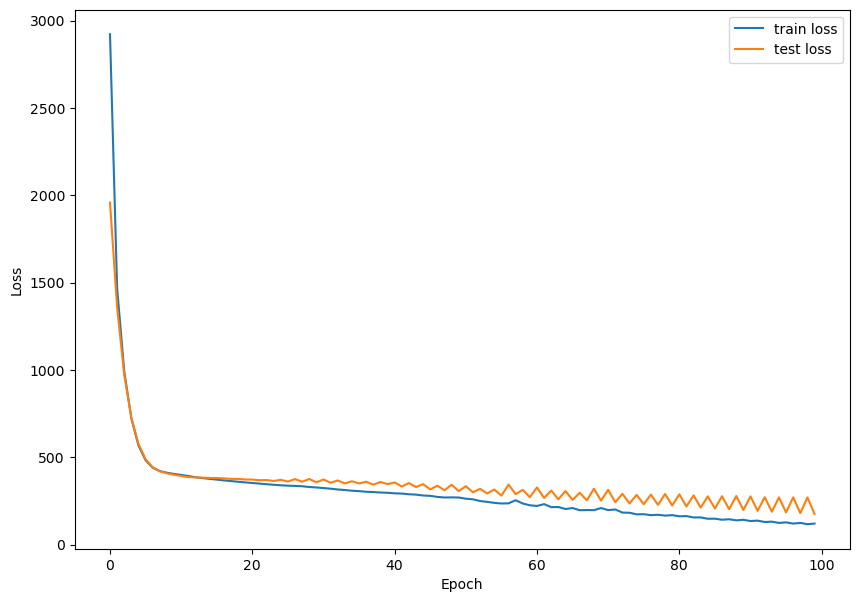

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

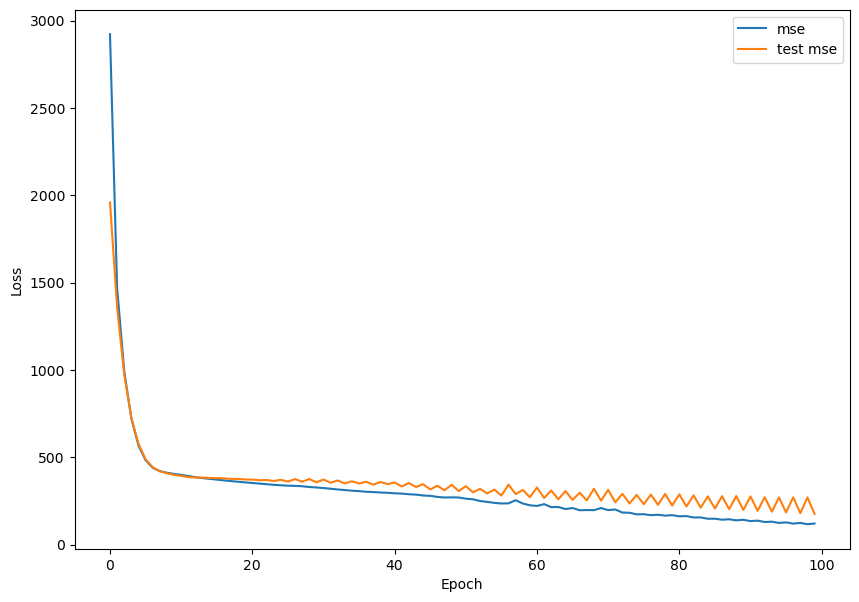

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()